<hr>
<p style="text-align:left;">
    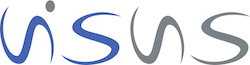
    <span style="float:right;">
        University of Stuttgart<br />Visualization Research Center
    </span>
</p>
<hr>
<p style="text-align:left;">
    <span style="float:left;">
        Prof. Daniel Weiskopf
    </span>
    <span style="float:right;">
        Sunday, 2024-11-24
    </span>
</p>
<br/>

# Theoretical and Methodological Foundations of Visual Computing
## Assignment 06
Responsible tutor: Daniel Klötzl
<br/>

> *Please submit your solution to ILIAS by <b>Sunday, 2024-12-01, 23:55</b>. <br /> Solutions will be discussed in the tutorial on <b>Thursday, 2024-12-05</b>.* <br /> *Please note that source code will only be accepted if it compiles.*
<hr>

**Student name(s):** <font color='green'>Guangxin Zhao</font> <br />
**Immatriculation number(s):** <font color='green'>st194136</font> <br />

<hr>

### Exercise 6.1 (3 points)
The second-order differential equation describing the motion of a frictionless pendulum is 
\begin{equation}
\ddot{\varphi} = -\frac{g}{l}\sin(\varphi).
\end{equation}
Here, $\varphi$ is the deflection angle of the pendulum, $l=1\,\text{m}$ is its length and $g=9.81\,\text{m}/\text{s}^2$ the gravitational constant of earth.

`(a)` Reformulate this equation as a set of first-order differential equations.

<font color='green'>Cell left blank for student response</font>



`(b)` Implement the *explicit Euler method* in Python to numerically solve this ODE system. Assume a time step of $\Delta t = 0.01\,\text{s}$, an initial deflection angle $\varphi_0 = 0$, and an initial angular speed $\omega_0 = \dot{\varphi}_0 = 1\,\text{s}^{-1}$.
Update the following Python snippet and implement the Euler method in `make_step_euler(...)`.

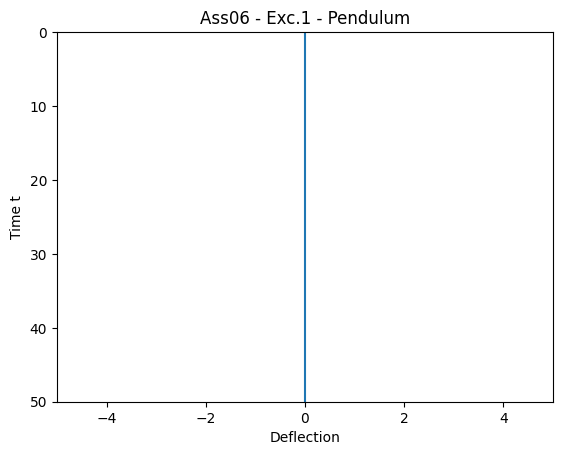

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Initialize variables
g = 0   # gravity
dt = 1  # time step
max_steps = int(50 / dt)  # number of time steps
l = 1  # length of pendulum

# Initial values
omega0 = 0
phi0 = 0

phi_euler = phi0
omega_euler = omega0
t = 0.0

# Vectors for plot
y_euler = np.zeros(max_steps + 1)
tA = np.zeros(max_steps + 1)

# Set initial values
y_euler[0] = phi0

# TODO: Function to compute explicit Euler step
def make_step_euler(phi, omega, dt, g, l):
    phi = 0
    omega = 0
    return phi, omega

# Main loop
for m in range(max_steps):
    phi_euler, omega_euler = make_step_euler(phi_euler, omega_euler, dt, g, l)
    # Advance t
    t += dt
    
    y_euler[m + 1] = phi_euler
    tA[m + 1] = t

# Plot
plt.figure()
plt.plot(y_euler, tA)

plt.axis([-5, 5, 0, 50])
plt.gca().invert_yaxis()
plt.title('Ass06 - Exc.1 - Pendulum')
plt.xlabel('Deflection')
plt.ylabel('Time t')
plt.show()

<hr>

### Exercise 6.2 (8 points)

Given is the time-dependent two-dimensional real-valued vector field
\begin{equation}
    \vec{v}(\vec{x},t) =  \begin{pmatrix} v_x(t) \\ v_y(t) \end{pmatrix} = \begin{pmatrix} \frac{x}{1+t} + sin(t) \\ cos(t) \end{pmatrix} \quad \forall t \in \mathbb{R}\backslash  \{-1\}, \, \vec{x}=(x,y)\in \mathbb{R}^2.
\end{equation}

`(a)` Describe the concept of a stream-, path-, and streakline in your own words (one sentence each).

<font color='green'>Cell left blank for student response</font>

`(b)` Draw the stream-, path-, and streakline using Python, depending on the starting point $(x_0, y_0) = (-1,-1) \in \mathbb{R}^2$ at $t_0 = \frac{3}{2}\pi$ into a $x-y-t$ diagram at $t_0+\Delta t$ with $\Delta t\in\{0.5\pi,\exp(1),\,\pi,\,1.5\pi,\,2\pi,\, 4\pi \}$ and $(x,y) \in [-5,5]^2$.
- For the streamline integration, use a step size of $\Delta s = 0.001$.
- For the time integration, use a step size of $\Delta t = 0.001$.

> Hint: Do not use existing functions for the computation of stream-, path-, and streaklines. Instead, implement separate functions for stream-, path-, and streaklines and solve the respective ODEs via the explicit Euler method. Double-check your results with the example from the lecture for $t\in[0,100]$ and the vector field $\vec{v}(\vec{x}, t):= \big(\frac{x}{1+t}, \frac{y}{1+2t} \big)$ with $(x_0, y_0) = (0.1,0.5) \in \mathbb{R}^2$.

In [2]:
#YOUR CODE HERE

<hr>

### Exercise 6.3 (3 points)

For which values of $a$ is the partial differential equation elliptic, parabolic, or hyperbolic? 

`(a)` $a \frac{\partial^2 u}{\partial t^2} + (5-a) \frac{\partial^2 u}{\partial x^2} - \frac{\partial u}{\partial t} = 0.$


<font color='green'>Cell left blank for student response</font>



`(b)` $a \frac{\partial^2 u}{\partial t^2} + 4 \frac{\partial^2 u}{\partial t \partial x} + (5-a) \frac{\partial^2 u}{\partial x^2} = 0.$

<font color='green'>Cell left blank for student response</font>



<hr>

### Exercise 6.4 (6 points)

Consider the 1D partial differential equation (heat equation) with the parameter $k \in \mathbb{R}$:
\begin{equation}
    \frac{\partial u}{\partial t} = k^2 \frac{\partial^2 u}{\partial x^2}. 
\end{equation}

`(a)` Show that if $v_1(x,t)$ and $v_2(x,t)$ are solutions of the partial differential equation (ignoring any boundary conditions), then the function $v(x,t) = c_1 v_1(x,t) + c_2 v_2(x,t)$ for coefficients $c_1,c_2 \in \mathbb{R}$ solves the partial differential equation as well.


<font color='green'>Cell left blank for student response</font>



`(b)`Consider the domain $x \in [0,L]$ with $L >0$ and $t>0$ as well as the initial condition 
\begin{equation}
u(x,0) = -20 \sin\left(x \cdot \frac{\pi}{L}\right)+ 20 + \frac{40-20}{L} x \qquad \text{ for } x \in [0,L]
\end{equation} 
and boundary condition
\begin{equation}
u(0,t) = 20, \quad u(L,t) = 40 \qquad \text{ for } t>0.
\end{equation}
We know from the lecture that separation of variables leads to a general solution that consists of summands of the form
\begin{equation}
v(x,t) = c e^{- \omega^2 k^2 t} \sin(\omega x),
\end{equation}
where $c, \omega \in \mathbb{R}$ are parameters. With this and with the help of a), verify that
\begin{equation}
u(x,t) = -20e^{- \left(\frac{\pi}{L}\right)^2 k^2 t} \sin\left(x \cdot \frac{\pi}{L}\right) + 20 + \frac{40-20}{L} x
\end{equation}
is a solution for the partial differential equation that satisfies the initial condition and the boundary condition.

<font color='green'>Cell left blank for student response</font>



`(c)` Relate the above 1D partial differential equation to a physical phenomenon: Having in mind that the equation characterizes evolution of temperature (or in general diffusion), describe a concrete scenario and take into account the values/parameters $u(x,t)$, $x$, $t$, $L$, and $k$ as well as the initial and boundary condition from b). 
Elaborate on the ``stability'' of the solution, i.e., determine and explain $\lim_{t \rightarrow \infty} u(x,t) = u_\infty(x)$. You can also use simple sketches/visualizations with annotations (done by hand or via Python).

<font color='green'>Cell left blank for student response</font>



<hr>

<div class="alert alert-success">

### Guidelines for Submission

Do not forget to update the student name(s) and matriculation number(s). 

**Text-based Responses**

For text-based questions, a markdown cell with the placeholder `Cell left blank for student response` will usually follow the question. Ensure that text responses are either entered in markdown cells using plain text and LaTeX or via the import of PDFs or PNG files (e.g. via `![ExampleFileName](example_file.png)` for handwritten solutions). If external files are used in your Jupyter Notebook, make sure to include all data in a zipped folder uploaded to Ilias.

**Code-based Responses**

For questions that involve Python coding, you'll typically find a code cell with the placeholder `# YOUR CODE HERE`.

#### Submission Process

To ensure your notebook runs smoothly from start to finish, select "Restart & Run All" from the "Kernel" menu before submitting.

When ready to submit, upload your `.ipynb` file (or a zipped folder containing the `.ipynb` file as well as all auxiliary files, e.g. imported .pdf or .jpg files) to Ilias.

</div>